In [39]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df=pd.read_csv('/Users/rajathanda/Downloads/Principal_Project/Principal_Data/pr1.csv', encoding='utf-8')

In [3]:
unique_ids = pd.unique(df.IDENTIFIER)

In [4]:
#number of companies
np.count_nonzero(unique_ids)

5352

In [13]:
len(unique_ids)

5352

In [5]:
NaN_vectors = np.zeros(shape=(len(unique_ids), df.shape[1]))

In [6]:
for i, i_id in enumerate(unique_ids):
    data_sub = df[df.IDENTIFIER ==i_id]
    NaN_vectors[i,:] = np.sum(data_sub.isnull(),axis=0) /float(data_sub.shape[0])

In [36]:
Numeric_variables = [x for x in df.columns.values if x not in ['FUTURE 1 WEEK RETURN',
 'FUTURE 4 WEEK RETURNS',
 'FUTURE 8 WEEK RETURNS',
 'FUTURE 12 WEEK RETURNS',
 'FUTURE 16 WEEK RETURNS',
 'FUTURE 20 WEEK RETURNS',
 'FUTURE 24 WEEK RETURNS',
 'FUTURE 28 WEEK RETURNS',
 'FUTURE 32 WEEK RETURNS',
 'FUTURE 36 WEEK RETURNS',
 'FUTURE 40 WEEK RETURNS',
 'FUTURE 44 WEEK RETURNS',
 'FUTURE 48 WEEK RETURNS','TICKER','Week/Year','Year','PERIOD (FORMATTED)', 'IDENTIFIER' , 'MARKET CAPITALIZATION','MSCI ACWI FLAG','R1000 FLAG','SP PMI FLAG',            
                                                              'FG_COUNTRY','REGION_XL','SECTOR',
                                                              'PERF_INDGRP','NAME']]


In [35]:
data_sub[['PERIOD (FORMATTED)',"NAME",'PP_RANK']]

,PERIOD (FORMATTED),NAME,PP_RANK
1457578,12/01/2017,Sime Darby Property Bhd.,NaN
1457832,12/08/2017,Sime Darby Property Bhd.,NaN
1458086,12/15/2017,Sime Darby Property Bhd.,98.098
1458340,12/22/2017,Sime Darby Property Bhd.,97.097
1458594,12/29/2017,Sime Darby Property Bhd.,98.098


In [7]:
bin_NaN = 1*(NaN_vectors==1)
print("Still has the shape of {} by {}".format(bin_NaN.shape[0],bin_NaN.shape[1]))

Still has the shape of 5352 by 310


In [37]:
1*NaN_vectors==1

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False],
       ..., 
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True,  True, False]], dtype=bool)

In [8]:
bin_cov=np.corrcoef(bin_NaN.T)
bin_cov.shape[1]

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


310

In [46]:
lf=list(df.columns)

In [49]:
lf

['IDENTIFIER',
 'NAME',
 'PERIOD (FORMATTED)',
 'PERIOD (YYYYMMDD)',
 'TICKER',
 'FUTURE 1 WEEK RETURN',
 'FUTURE 4 WEEK RETURNS',
 'FUTURE 8 WEEK RETURNS',
 'FUTURE 12 WEEK RETURNS',
 'FUTURE 16 WEEK RETURNS',
 'FUTURE 20 WEEK RETURNS',
 'FUTURE 24 WEEK RETURNS',
 'FUTURE 28 WEEK RETURNS',
 'FUTURE 32 WEEK RETURNS',
 'FUTURE 36 WEEK RETURNS',
 'FUTURE 40 WEEK RETURNS',
 'FUTURE 44 WEEK RETURNS',
 'FUTURE 48 WEEK RETURNS',
 'WEIGHT',
 'MARKET CAPITALIZATION',
 'PERF_INDGRP',
 'FG_COUNTRY',
 'REGION_XL',
 'MSCI ACWI FLAG',
 'R1000 FLAG',
 'SP PMI FLAG',
 'RANK',
 '1M_RET',
 '3M_RET',
 '6M_RET',
 '9M_RET',
 '12M_RET',
 'RET9M_L1M',
 'RET12M_L1M',
 '1M_6MUSDVOL_CHG',
 '1M_6MVOL_CHG',
 '1MVT',
 '3MVT',
 '6MVT',
 '12MVT',
 'P_ACTION',
 'RSI60D',
 'LOTTERY1M',
 '1YHIGH_OFF',
 'COMPMOM_SCORE',
 'BETA_1Y',
 'BETA_3Y',
 'CFO_P',
 'FCF_P',
 'NET_CFO_P',
 'EP_LTM',
 'SALES_EV',
 'BK_P',
 'SALES_P',
 'DIV_YID',
 'EDA_EV',
 'EBIT_MCAP',
 'MCAP',
 'FCF_EV',
 'AST_P',
 'FY1_P',
 'FY2_P',
 'EPS_P_NTM'

In [67]:
lf[200]

'EV.1'

In [68]:
lf[148]

'MIN12M'

In [55]:
output=bin_cov[bin_cov==1]

In [58]:
np.select(bin_cov==1,bin_cov)

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,
        0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0

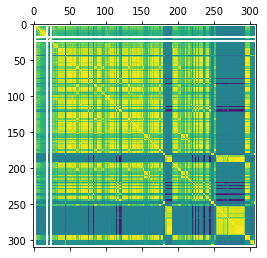

In [20]:
plt.matshow(bin_cov)


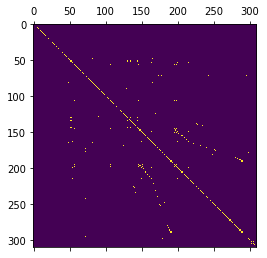

In [21]:
plt.matshow(bin_cov == 1) 

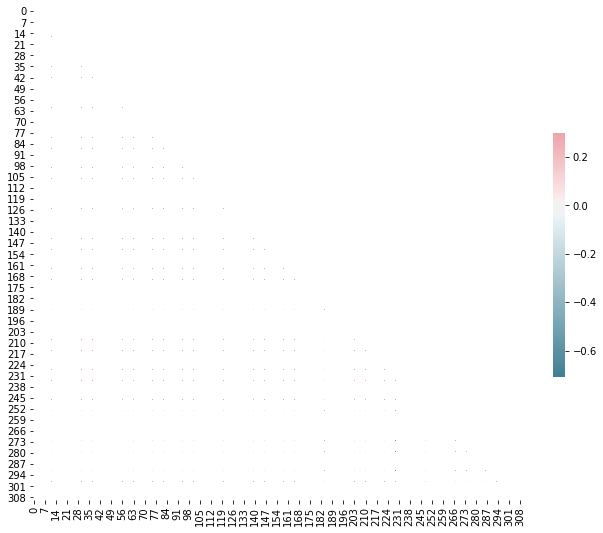

In [61]:
mask = np.zeros_like(bin_cov, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(bin_cov, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

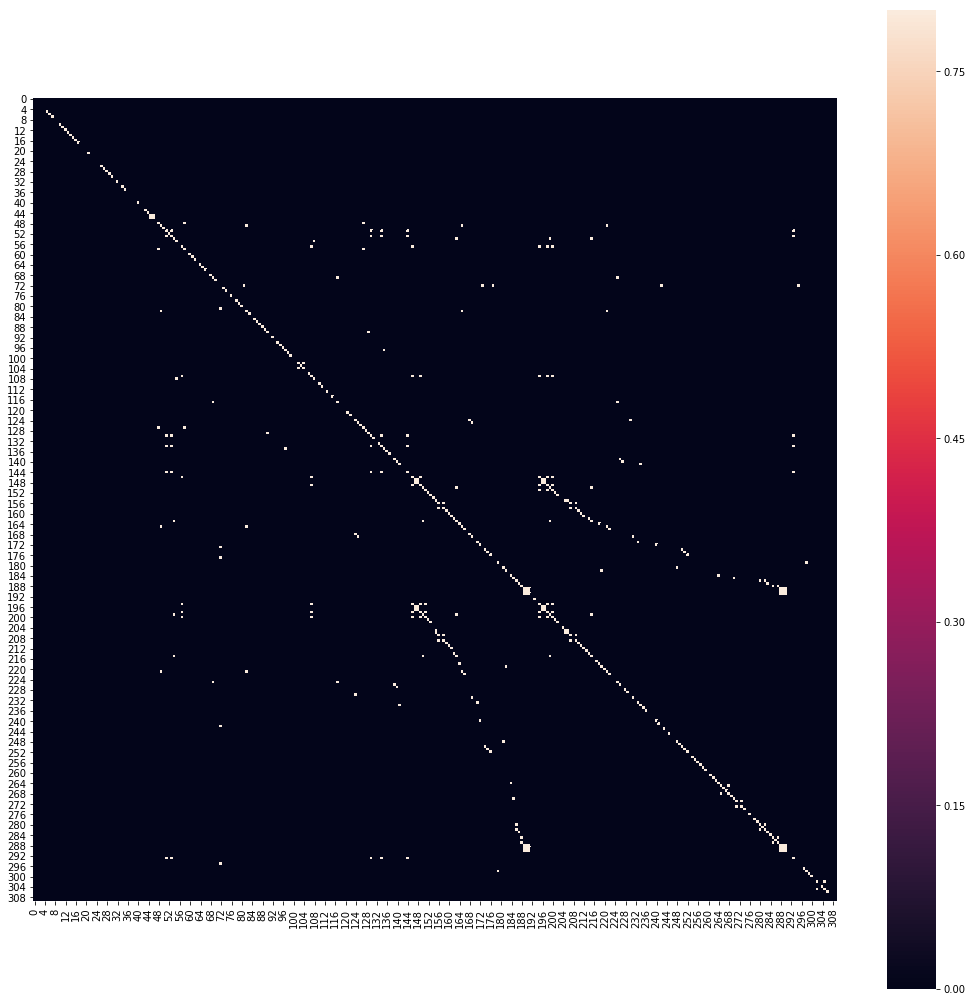

In [66]:
f, ax = plt.subplots(figsize=(18, 18))

# Draw the heatmap using seaborn
sns.heatmap(bin_cov==1, vmax=.8, square=True)
plt.show()

In [22]:
edges = []
count =np.dot(bin_NaN.T,bin_NaN)
for i in range(bin_cov.shape[0]):
    for j in range(bin_cov.shape[0]-i):
        if i!=i+j and bin_cov[i,i+j]==1:
            edges.append([i,i+j,count[i,i+j]])
print(edges)

[[45, 46, 109], [48, 58, 172], [48, 127, 172], [49, 82, 166], [49, 165, 166], [49, 221, 166], [51, 53, 165], [51, 130, 165], [51, 134, 165], [51, 144, 165], [51, 293, 165], [53, 130, 165], [53, 134, 165], [53, 144, 165], [53, 293, 165], [54, 163, 236], [54, 199, 236], [54, 215, 236], [55, 108, 182], [57, 107, 158], [57, 146, 158], [57, 195, 158], [57, 198, 158], [57, 200, 158], [58, 127, 172], [69, 117, 171], [69, 225, 171], [72, 81, 169], [72, 173, 169], [72, 177, 169], [72, 242, 169], [72, 295, 169], [82, 165, 166], [82, 221, 166], [90, 129, 162], [97, 135, 268], [102, 104, 221], [107, 146, 158], [107, 149, 158], [107, 195, 158], [107, 198, 158], [107, 200, 158], [117, 225, 171], [124, 168, 193], [124, 230, 193], [125, 169, 175], [130, 134, 165], [130, 144, 165], [130, 293, 165], [134, 144, 165], [134, 293, 165], [139, 226, 181], [140, 227, 170], [141, 234, 177], [144, 293, 165], [146, 149, 158], [146, 195, 158], [146, 198, 158], [146, 200, 158], [147, 148, 190], [147, 196, 190], [14

In [23]:
ucount = [i[2] for i in edges]
print(np.unique(ucount))

[ 109  158  162  165  166  169  170  171  172  175  177  178  179  181  182
  183  189  190  193  218  221  236  268  282  312  367  394  396  445  478
  495  526  600  688 2756 3792 4627 4897 4948 4968 4970 4972 4975 5102]


In [24]:
print('rows: {}'.format(bin_NaN.shape[0]))
print('cols: {}'.format(len(edges)))


rows: 5352
cols: 134


In [25]:
nan_features = np.zeros((bin_NaN.shape[0],len(edges)))
for i in range(bin_NaN.shape[0]):
    for j, edge in enumerate(edges):
        nan_features[i,j] = 1*(bin_NaN[i,edge[0]] & bin_NaN[i,edge[1]])

print('this is just a check that indexing is correct: {}'.format(np.sum(nan_features,axis=1).shape[0]))

this is just a check that indexing is correct: 5352


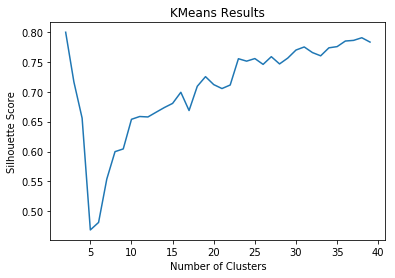

In [148]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Range for k
kmin = 2
kmax = 40
sil_scores = []

#Compute silouhette scoeres
for k in range(kmin,kmax):
    km = KMeans(n_clusters=k, n_init=20).fit(nan_features)
    sil_scores.append(silhouette_score(nan_features, km.labels_))

#Plot
plt.plot(range(kmin,kmax), sil_scores)
plt.title('KMeans Results')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [27]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

X = nan_features

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 40


In [28]:
k=40
km = KMeans(n_clusters=k, n_init=20).fit(nan_features)
colors=km.labels_

t-SNE: 4e+02 sec


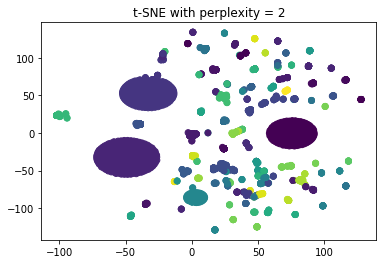

t-SNE: 3.8e+02 sec


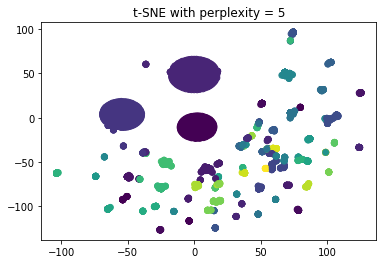

t-SNE: 4.9e+02 sec


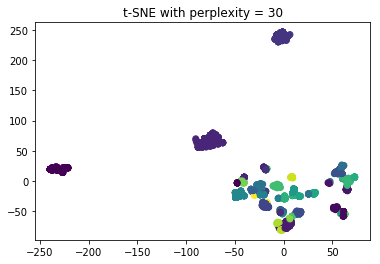

t-SNE: 5e+02 sec


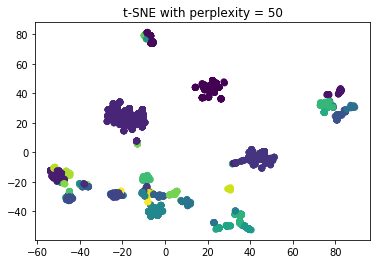

t-SNE: 8e+02 sec


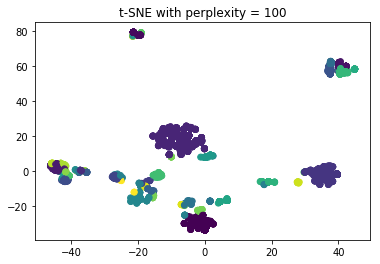

In [29]:
from sklearn.manifold import TSNE
from time import time

n_iter = 5000

for i in [2, 5, 30, 50, 100]:
    t0 = time()
    model = TSNE(n_components=2, n_iter = n_iter,random_state=0, perplexity =i)
    np.set_printoptions(suppress=True)
    Y = model.fit_transform(nan_features)
    t1 =time()

    print( "t-SNE: %.2g sec" % (t1 -t0))
    plt.scatter(Y[:, 0], Y[:, 1], c= colors)
    plt.title('t-SNE with perplexity = {}'.format(i))
    plt.show()

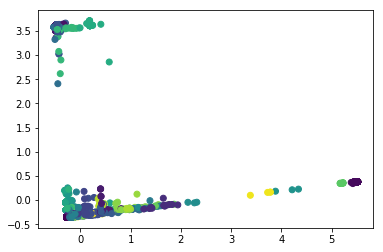

In [31]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=colors)

In [44]:
corrmat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(18, 18))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

KeyboardInterrupt: 

In [ ]:
from sklearn import decomposition

NameError: name 'decomposition' is not defined

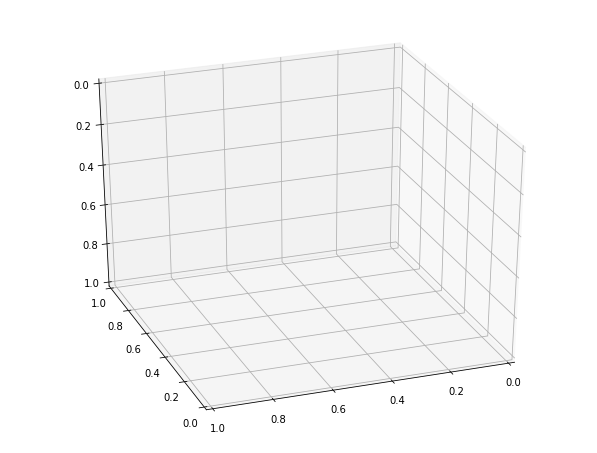

In [40]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = decomposition.PCA(n_components=3).fit_transform(nan_features)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],c=colors,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

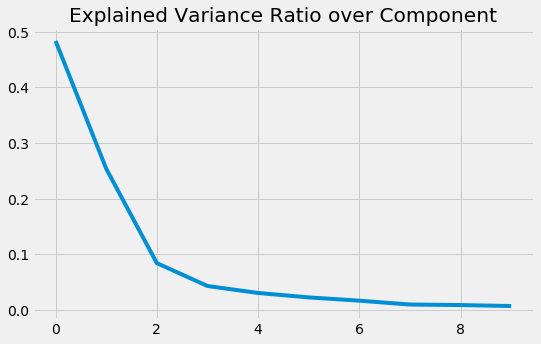

In [33]:
n_eigens=10
X_reduced = decomposition.PCA(n_components=n_eigens).fit(nan_features)
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8, 5));
    plt.title('Explained Variance Ratio over Component');
    plt.plot(X_reduced.explained_variance_ratio_);


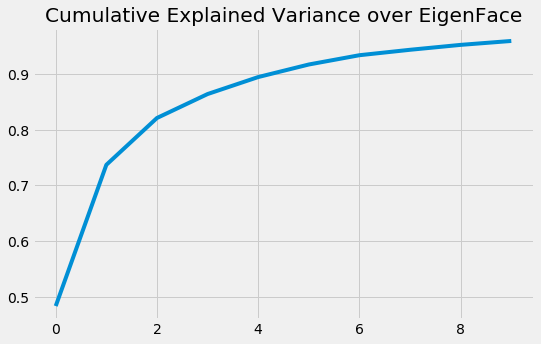

In [34]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8, 5));
    plt.title('Cumulative Explained Variance over EigenFace');
    plt.plot(X_reduced.explained_variance_ratio_.cumsum());

In [35]:
print('PCA captures {:.2f} percent of the variance in the dataset'.format(X_reduced.explained_variance_ratio_.sum() * 100))
print('PCA components have dimensions {} by {}'.format(*X_reduced.components_.shape))


PCA captures 95.96 percent of the variance in the dataset
PCA components have dimensions 10 by 134


In [37]:
df_id_vs_variable = df[['IDENTIFIER']+Numeric_variables]

In [38]:
df_id_vs_variable = df_id_vs_variable.fillna(0)

In [39]:
def makeBinary(x):
    if abs(x) > 0.00000:
        return 1
    else:
        return 0

df_id_vs_variable = df_id_vs_variable.groupby('IDENTIFIER').agg('sum').applymap(makeBinary)

df_id_vs_variable.head()

,PERIOD (YYYYMMDD),WEIGHT,RANK,1M_RET,3M_RET,6M_RET,9M_RET,12M_RET,RET9M_L1M,RET12M_L1M,...,TECHNICAL1.1,PP_RANK,ADJ_DIV_YID,ADJ_BK_P,ADJ_EP_LTM,ADJ_SALES_P,ADJ_FCF_P,AVG_SI_VOL_4M,SEN_AAA_10YR,SHY_RANK
IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
000312,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
00101J10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
00105510,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
00108410,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
00120410,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


In [40]:
df_unique_set_variables = df_id_vs_variable.drop_duplicates(keep="first")

print("Number of securities: {0}".format(df_id_vs_variable.shape[0]))
print("Number of unique lines: {0}".format(df_unique_set_variables.shape[0]))

Number of securities: 5352
Number of unique lines: 1759


In [42]:
df_cluster = df_id_vs_variable.loc[df_id_vs_variable.duplicated(Numeric_variables,keep=False)]

df_cluster = df_cluster.groupby(Numeric_variables).size()

array_cluster = df_cluster.values

In [45]:
df_no_cluster = df_id_vs_variable.loc[~df_id_vs_variable.duplicated(Numeric_variables,keep=False)]

Number of securities that do not belong to a cluster:1421
Number of clusters: 338
Number of securities that belong to a cluster: 3931
##########################
   Clusters Statistics
##########################
count    338.000000
mean      11.630178
std       38.487840
min        2.000000
25%        2.000000
50%        3.000000
75%        6.000000
max      455.000000
dtype: float64


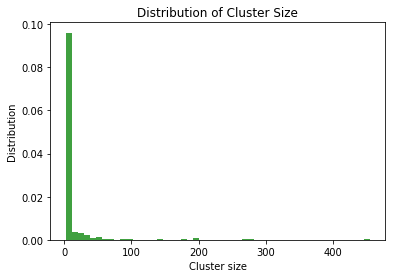

In [46]:
print("Number of securities that do not belong to a cluster:{0}".format(df_no_cluster.shape[0]))
print("Number of clusters: {0}".format(len(array_cluster)))
print("Number of securities that belong to a cluster: {0}".format(sum(array_cluster)))
print("##########################")
print("   Clusters Statistics")
print("##########################")
print(df_cluster.describe())
n, bins, patches = plt.hist(array_cluster, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Cluster size')
plt.ylabel('Distribution')
plt.title(r'Distribution of Cluster Size')
plt.show()

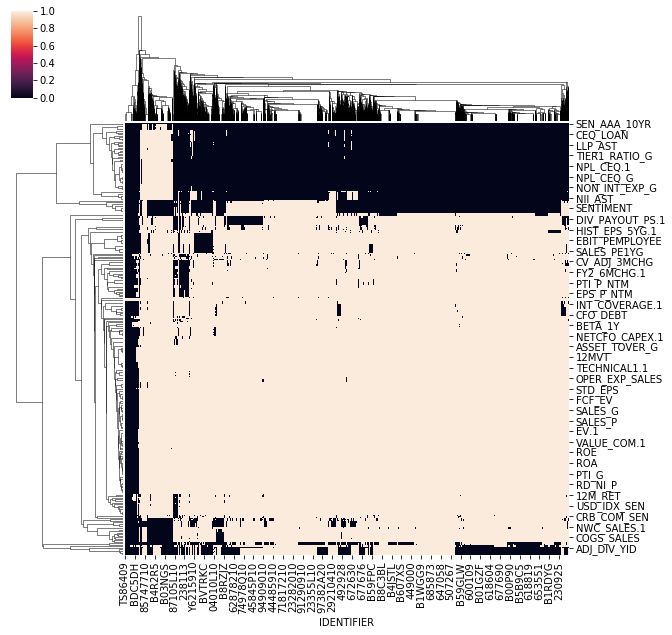

In [47]:
sns.clustermap(df_id_vs_variable.transpose())

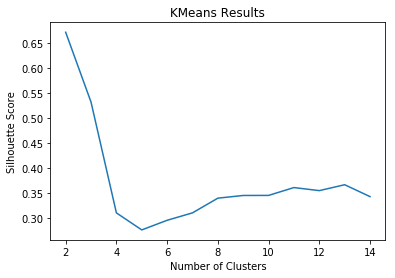

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Range for k
kmin = 2
kmax = 15
sil_scores = []

#Compute silouhette scoeres
for k in range(kmin,kmax):
    km = KMeans(n_clusters=k, n_init=20).fit(df_id_vs_variable)
    sil_scores.append(silhouette_score(df_id_vs_variable, km.labels_))

#Plot
plt.plot(range(kmin,kmax), sil_scores)
plt.title('KMeans Results')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [52]:
n_clust = 2
km = KMeans(n_clusters=n_clust, n_init=20).fit(df_id_vs_variable)
clust = km.predict(df_id_vs_variable)

In [53]:
#Init table of indexes
df_clust_index = {}
for i in range(0,n_clust):
    df_clust_index[i]=[]

#Fill the cluster index
for i in range(0,len(clust)):
    df_clust_index[clust[i]].append(i)

for i in range(0,n_clust):
    df_clust_index[i] = df_id_vs_variable.iloc[df_clust_index[i]].index.values



df_clust = []

for i in range(0,n_clust):
    df_clust.append(df.loc[df.IDENTIFIER.isin(df_clust_index[i])])

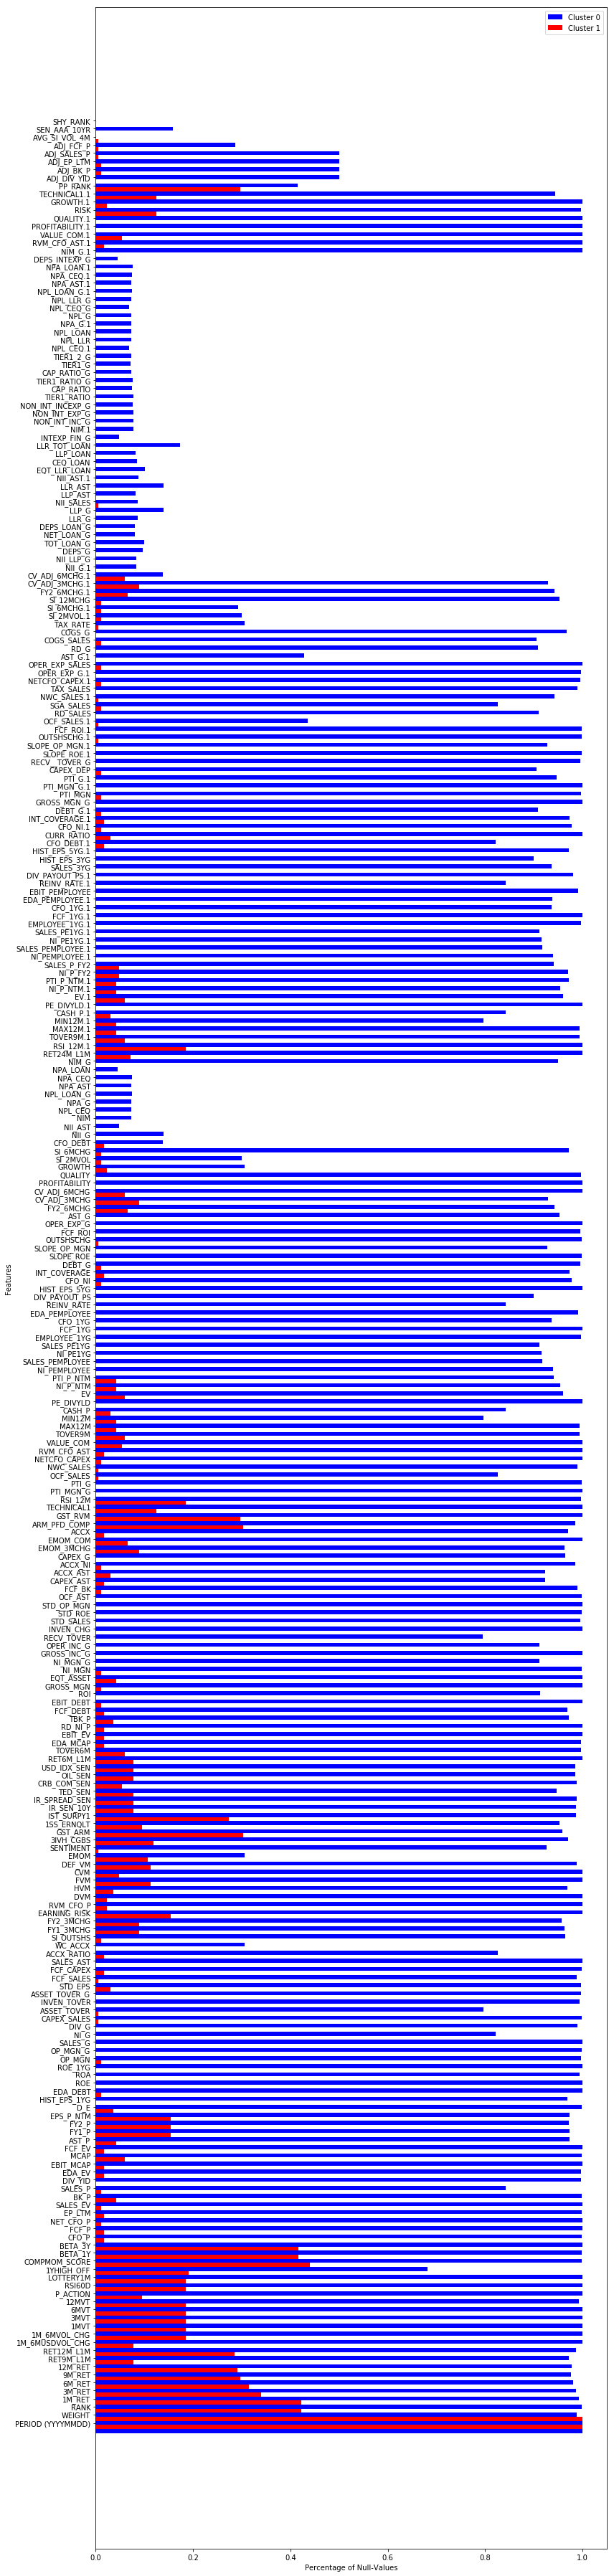

In [54]:
non_null_0 = df_id_vs_variable.loc[clust==0].sum() / df_id_vs_variable.loc[clust==0].shape[0]
non_null_1 = df_id_vs_variable.loc[clust==1].sum() / df_id_vs_variable.loc[clust==1].shape[0]


df_non_null_comparison = pd.concat([non_null_0,non_null_1],axis=1)

bar_width = 1
index = np.arange(df_non_null_comparison.shape[0])

fig, ax = plt.subplots(figsize=(12,50))

rects1 = plt.barh(index ,  np.array(df_non_null_comparison[0]), bar_width/2,
                 color='b',
                 label='Cluster 0')

rects1 = plt.barh(index + bar_width/2,  np.array(df_non_null_comparison[1]), bar_width/2,
                 color='r',
                 label='Cluster 1')


#plt.figure(figsize=(20,50))
plt.legend()
plt.xlabel('Percentage of Null-Values')
plt.ylabel('Features')
plt.yticks(index + bar_width, df_non_null_comparison.index.values)
plt.tight_layout()
plt.show()

In [55]:
non_null_threshold = 0.95

col_0 = non_null_0.loc[non_null_0 > non_null_threshold].index.values
col_1 = non_null_1.loc[non_null_1 > non_null_threshold].index.values


In [56]:
col_0

array(['PERIOD (YYYYMMDD)', 'WEIGHT', 'RANK', '1M_RET', '3M_RET', '6M_RET',
       '9M_RET', '12M_RET', 'RET9M_L1M', 'RET12M_L1M', '1M_6MUSDVOL_CHG',
       '1M_6MVOL_CHG', '1MVT', '3MVT', '6MVT', '12MVT', 'P_ACTION',
       'RSI60D', 'LOTTERY1M', '1YHIGH_OFF', 'BETA_1Y', 'BETA_3Y', 'CFO_P',
       'FCF_P', 'NET_CFO_P', 'EP_LTM', 'SALES_EV', 'BK_P', 'SALES_P',
       'EDA_EV', 'EBIT_MCAP', 'MCAP', 'FCF_EV', 'AST_P', 'FY1_P', 'FY2_P',
       'EPS_P_NTM', 'D_E', 'HIST_EPS_1YG', 'EDA_DEBT', 'ROE', 'ROA',
       'ROE_1YG', 'OP_MGN', 'OP_MGN_G', 'SALES_G', 'NI_G', 'CAPEX_SALES',
       'ASSET_TOVER', 'ASSET_TOVER_G', 'STD_EPS', 'FCF_SALES', 'FCF_CAPEX',
       'SALES_AST', 'ACCX_RATIO', 'FY1_3MCHG', 'FY2_3MCHG', 'EARNING_RISK',
       'RVM_CFO_P', 'DVM', 'HVM', 'FVM', 'CVM', 'DEF_VM', 'EMOM',
       'GST_ARM', '1SS_ERNQLT', 'IST_SURPY1', 'IR_SEN_10Y',
       'IR_SPREAD_SEN', 'TED_SEN', 'OIL_SEN', 'USD_IDX_SEN', 'RET6M_L1M',
       'TOVER6M', 'EDA_MCAP', 'EBIT_EV', 'RD_NI_P', 'TBK_P', 'FCF_D

In [57]:
col_1

array(['PERIOD (YYYYMMDD)', 'WEIGHT'], dtype=object)

In [58]:
common_cols = [x for x in col_0 if x in col_1]

print("Cluster 0 has {0} columns".format(len(col_0)))
print("Cluster 1 has {0} columns".format(len(col_1)))

print("Number of features present in both clusters: {0}".format(len(common_cols)))
print("Number of features that are only present in cluster 0: {0}".format(len([x for x in col_0 if x not in col_1])))
print("The following features are only present in cluster 1: {0}".format(len([x for x in col_1 if x not in col_0])))

Cluster 0 has 165 columns
Cluster 1 has 2 columns
Number of features present in both clusters: 2
Number of features that are only present in cluster 0: 163
The following features are only present in cluster 1: 0


/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


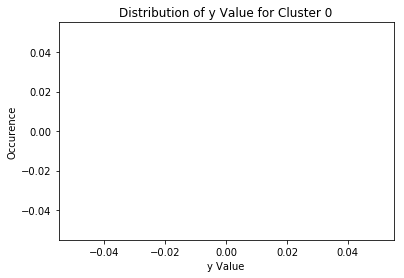

AttributeError: 'DataFrame' object has no attribute 'y'

In [65]:
for i in range(0,n_clust):
    n, bins, patches = plt.hist(df_clust[i].dropna().values, 50, normed=1, facecolor='green', alpha=0.75)
    plt.xlabel('y Value')
    plt.ylabel('Occurence')
    plt.title(r'Distribution of y Value for Cluster '+str(i))
    plt.show()
    print("Mean value: {:.3e}".format(df_clust[i].y.dropna().mean()))
    print("Standard deviation: {:.3e}".format(df_clust[i].y.dropna().std()))
    print("Median value: {:.3e}".format(df_clust[i].y.dropna().median()))
    print("Skew: {:.3e}".format(df_clust[i].y.dropna().skew()))
    print("Kurtosis: {:.3e}".format(df_clust[i].y.dropna().kurtosis()))


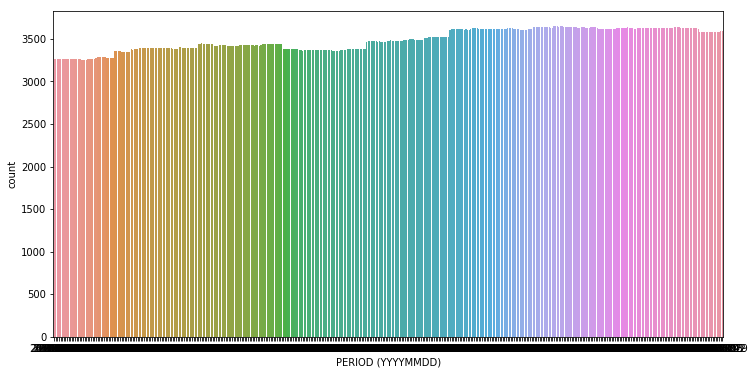

In [67]:
fig = plt.figure(figsize=(12, 6))
sns.countplot(x='PERIOD (YYYYMMDD)', data=df)
plt.show()

In [69]:
temp_df = df.groupby('IDENTIFIER')['FUTURE 24 WEEK RETURNS'].agg('mean').reset_index().sort_values(by='FUTURE 24 WEEK RETURNS')
temp_df.head()

,IDENTIFIER,FUTURE 24 WEEK RETURNS
5216,G6S01W10,-70.774067
369,17878Y10,-62.523029
3231,87422J10,-61.728308
3143,81809710,-56.309608
4060,B1Y47R,-54.408042


In [146]:
df['Year'] = df['PERIOD (FORMATTED)'].apply(lambda x: "%d" % (x.year))


AttributeError: 'str' object has no attribute 'year'

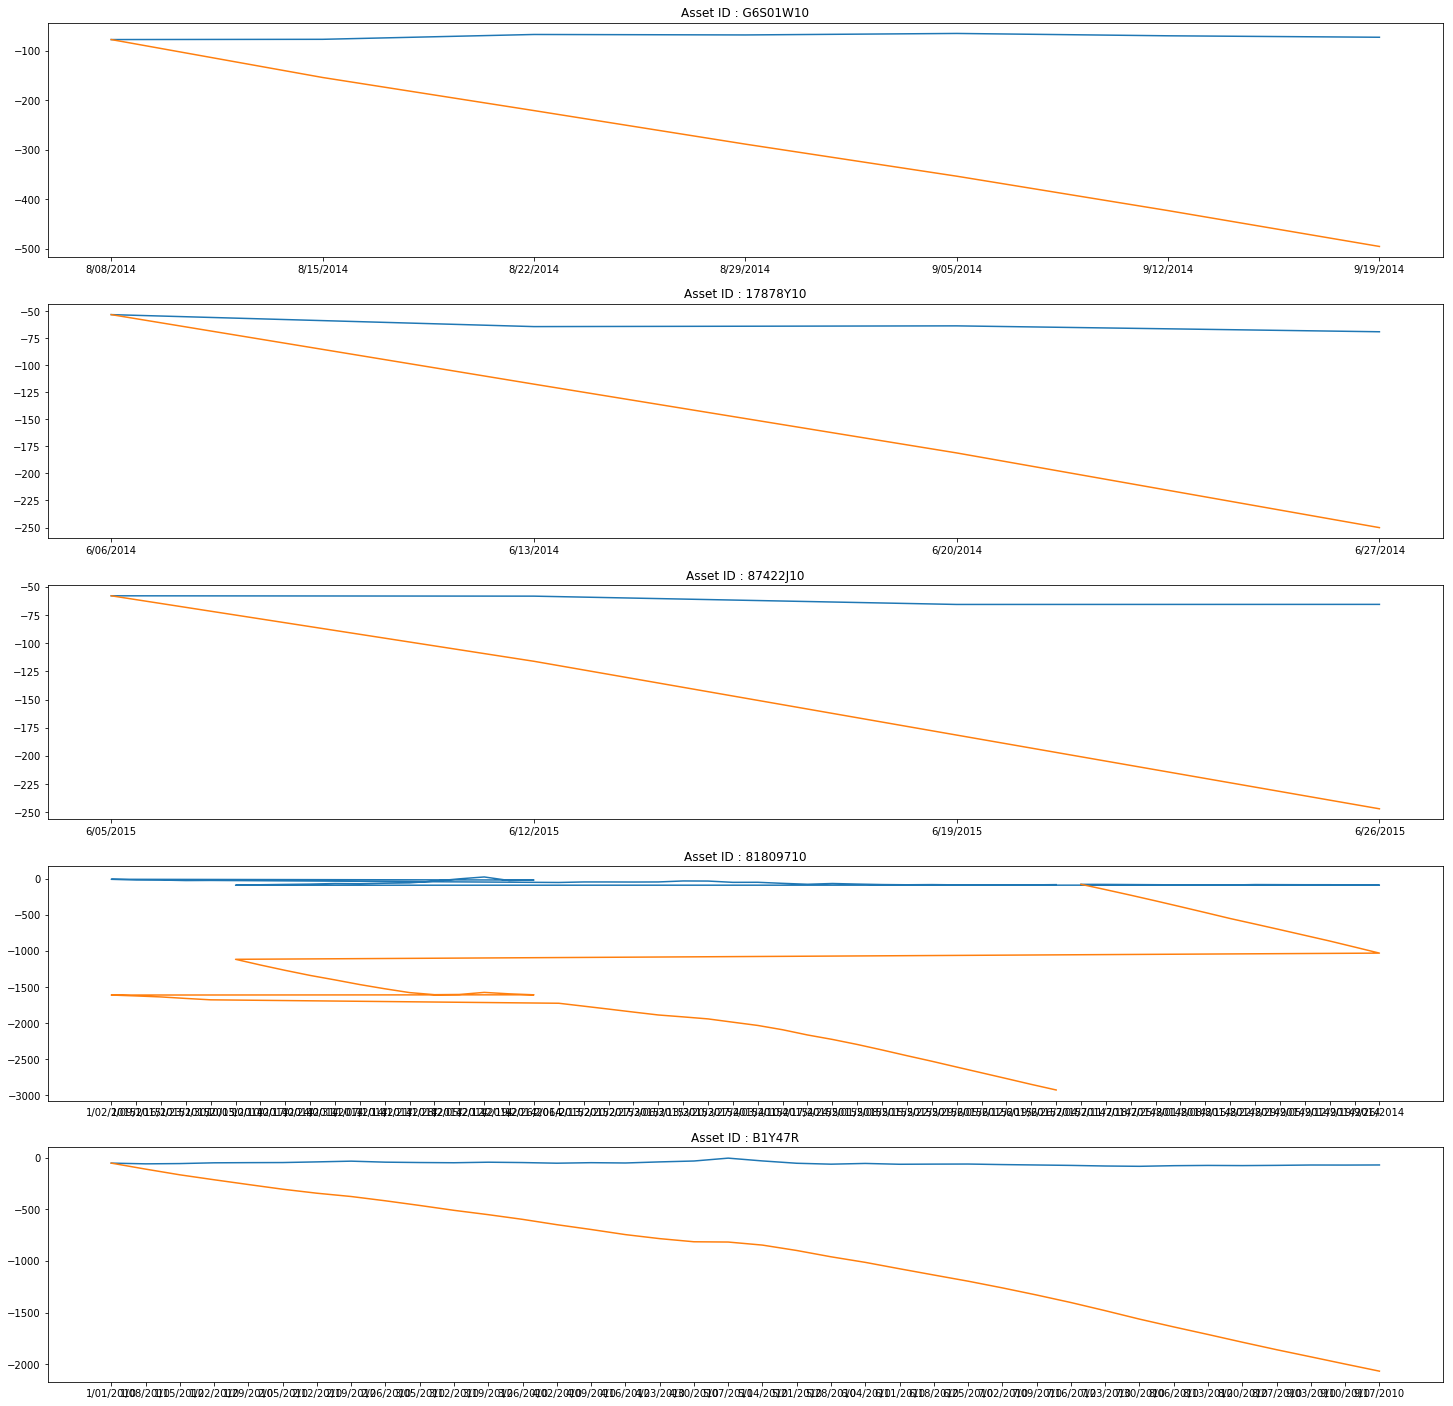

In [147]:
id_to_use = ['G6S01W10', '17878Y10', '87422J10', '81809710', 'B1Y47R']
fig = plt.figure(figsize=(25, 25))
plot_count = 0
for id_val in id_to_use:
    plot_count += 1
    plt.subplot(5, 1, plot_count)
    temp_df = df.ix[df['IDENTIFIER']==id_val,:]
    plt.plot(temp_df['PERIOD (FORMATTED)'].values, temp_df['FUTURE 24 WEEK RETURNS'].values)
    plt.plot(temp_df['PERIOD (FORMATTED)'].values,  temp_df['FUTURE 24 WEEK RETURNS'].cumsum())
    plt.title("Asset ID : "+str(id_val))
    
plt.show()

In [90]:
temp_df = df.groupby('IDENTIFIER')['FUTURE 24 WEEK RETURNS'].agg('mean').reset_index().sort_values(by='FUTURE 24 WEEK RETURNS',na_position='first')

In [93]:
temp_df.tail()

,IDENTIFIER,FUTURE 24 WEEK RETURNS
4897,BMTSB5,97.945617
2956,71715N10,106.826986
4928,BRJ8XY,121.340998
5217,G7280010,126.202603
4371,B50246,311.162365


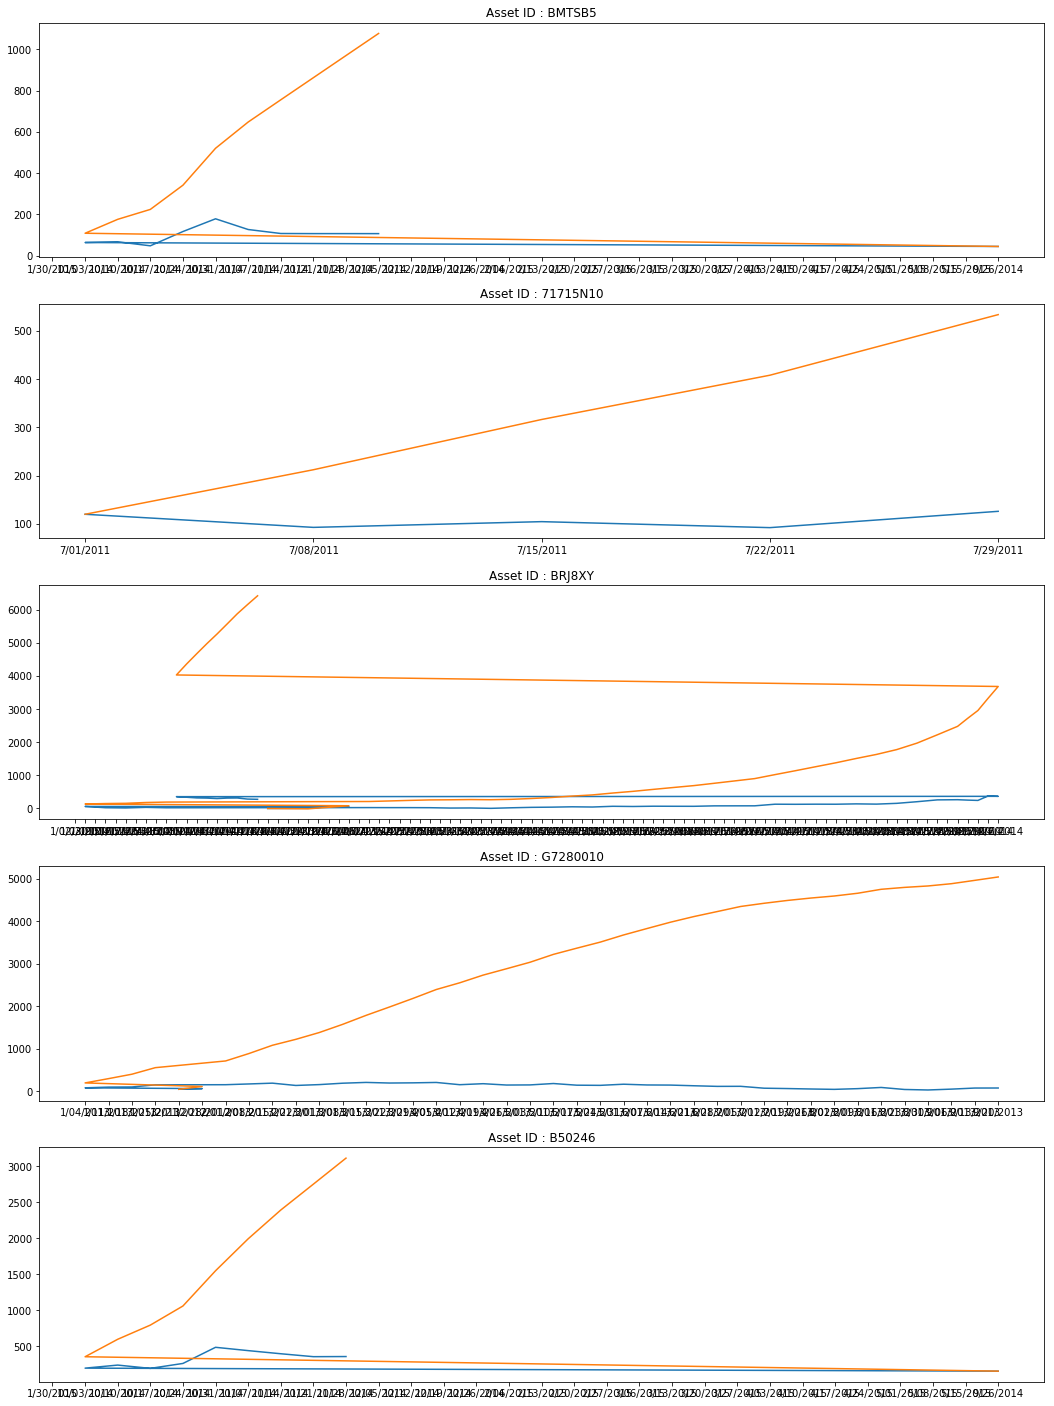

In [95]:
id_to_use = ['BMTSB5', '71715N10', 'BRJ8XY', 'G7280010', 'B50246']
fig = plt.figure(figsize=(18, 25))
plot_count = 0
for id_val in id_to_use:
    plot_count += 1
    plt.subplot(5, 1, plot_count)
    temp_df = df.ix[df['IDENTIFIER']==id_val,:]
    plt.plot(temp_df['PERIOD (FORMATTED)'].values, temp_df['FUTURE 24 WEEK RETURNS'].values)
    plt.plot(temp_df['PERIOD (FORMATTED)'].values,  temp_df['FUTURE 24 WEEK RETURNS'].cumsum())
    plt.title("Asset ID : "+str(id_val))
    
plt.show()

In [96]:
temp_df = df.groupby('IDENTIFIER')['FUTURE 24 WEEK RETURNS'].agg('count').reset_index().sort_values(by='FUTURE 24 WEEK RETURNS',na_position='first')

In [97]:
temp_df.tail()

,IDENTIFIER,FUTURE 24 WEEK RETURNS
2078,643960,397
2076,643856,397
3717,B0D749,397
3719,B0DJ8Q,397
4105,B23TGR,397


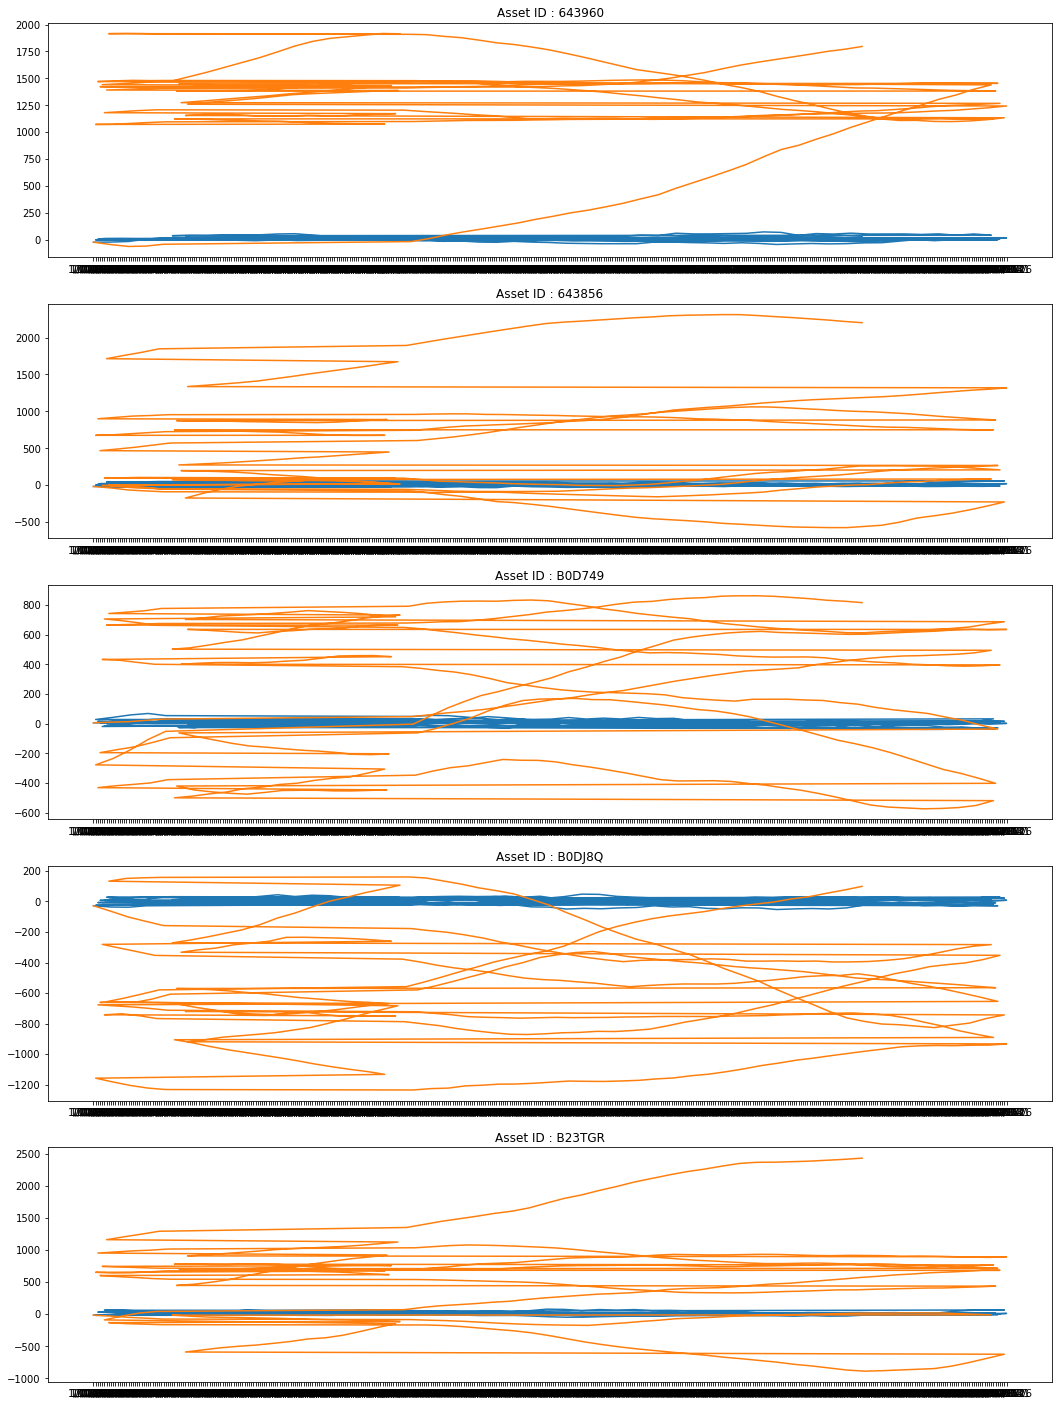

In [100]:
id_to_use = ['643960', '643856', 'B0D749', 'B0DJ8Q', 'B23TGR']
fig = plt.figure(figsize=(18, 25))
plot_count = 0
for id_val in id_to_use:
    plot_count += 1
    plt.subplot(5, 1, plot_count)
    temp_df = df.ix[df['IDENTIFIER']==id_val,:]
    plt.plot(temp_df['PERIOD (FORMATTED)'].values, temp_df['FUTURE 24 WEEK RETURNS'].values)
    plt.plot(temp_df['PERIOD (FORMATTED)'].values,  temp_df['FUTURE 24 WEEK RETURNS'].cumsum())
    plt.title("Asset ID : "+str(id_val))
    
plt.show()

In [129]:
dfId = df[['IDENTIFIER', 'PERIOD (YYYYMMDD)','REGION_XL','FUTURE 24 WEEK RETURNS']].groupby('IDENTIFIER').agg([
                    np.min, np.max, len, 
                lambda m: (list(m)[0] - list(m)[-1])/np.abs(np.mean(list(m))) ]  ).reset_index()

In [130]:
dfId

IDENTIFIER PERIOD (YYYYMMDD)                               \
                             amin      amax  len      <lambda>   
0        000312          20120601  20170811  272 -2.492329e-03   
1      00101J10          20121005  20160429  187 -1.957382e-03   
2      00105510          20100101  20171229  418 -3.532442e-03   
3      00108410          20100101  20171229  418 -3.532442e-03   
4      00120410          20100101  20160701  340 -3.010679e-03   
5      00123Q10          20110701  20171229  340 -3.004922e-03   
6      00130H10          20100101  20171229  418 -3.532442e-03   
7      00154710          20100101  20120622  130 -1.020516e-03   
8      00164V10          20110701  20171229  340 -3.004922e-03   
9      00176510          20100101  20111230  105 -5.535267e-04   
10     00184X10          20100101  20150619  286 -2.510437e-03   
11     00206R10          20100101  20171229  418 -3.532442e-03   
12     00215Q10          20100101  20110624   78 -5.234340e-04   
13     00244410          20100101  20150626  287 -2.510772e-03   
14     00253520          20100101  20101210   50 -5.517239e-05   
15     00253530          20101217  20160624  289 -2.950723e-03   
16     00282410          20100101  20171229  418 -3.532442e-03   
17       002826          20100101  20160916  351 -3.021208e-03   
18     00287Y10          20130104  20171229  261 -2.040872e-03   
19     00289620          20100101  20150626  287 -2.510772e-03   
20     00365410          20160701  20171229   79 -5.220318e-04   
21     00383Y10          20100101  20101015   42 -4.547141e-05   
22     00404A10          20150703  20171229  131 -1.018018e-03   
23     00422510          20160701  20171229   79 -5.220318e-04   
24       004561          20100101  20171229  418 -3.532442e-03   
25     00476410          20110701  20130329   92 -9.755869e-04   
26     00507V10          20100101  20171229  418 -3.532442e-03   
27     00508Y10          20140704  20171229  183 -1.514297e-03   
28       005367          20140926  20171229  171 -1.503195e-03   
29       005665          20100101  20171229  418 -3.532442e-03   
...         ...               ...       ...  ...           ...   
5322   TS110716          20160701  20160708    2 -3.472101e-07   
5323   TS113605          20170616  20170616    1  0.000000e+00   
5324   TS113632          20170421  20170421    1  0.000000e+00   
5325   TS114039          20170609  20170707    5 -4.858548e-06   
5326   TS114123          20170721  20170908    8 -9.270820e-06   
5327   TS115504          20171110  20171124    3 -6.940617e-07   
5328   TS115525          20171117  20171117    1  0.000000e+00   
5329   TS115552          20171208  20171208    1  0.000000e+00   
5330    TS86388          20100423  20100430    2 -3.482513e-07   
5331    TS86407          20100604  20100611    2 -3.482482e-07   
5332    TS86409          20100625  20100625    1  0.000000e+00   
5333    TS86416          20100702  20100813    7 -5.522184e-06   
5334    TS86472          20100723  20100827    6 -5.173927e-06   
5335    TS95669          20111230  20120302   10 -4.509107e-04   
5336    TS95678          20111216  20111230    3 -6.961287e-07   
5337    TS95683          20120106  20120113    2 -3.479106e-07   
5338    TS95788          20120106  20120120    3 -6.958211e-07   
5339    TS96010          20120316  20120518   10 -1.003955e-05   
5340    TS99773          20131129  20131213    3 -4.172631e-06   
5341   V7780T10          20100101  20171229  418 -3.532442e-03   
5342   Y0017S10          20100924  20110916   52 -4.969217e-04   
5343   Y0982710          20100702  20171229  392 -3.502188e-03   
5344   Y1771G10          20120928  20171229  275 -2.496427e-03   
5345   Y2066G10          20100101  20160916  351 -3.021208e-03   
5346   Y2109Q70          20100101  20150918  299 -2.525144e-03   
5347   Y2573F10          20100101  20171229  418 -3.532442e-03   
5348   Y6215910          20150925  20160916   52 -4.956353e-04   
5349   Y6219610          20130927  20150918  

In [106]:
dfId.sort_values([('PERIOD (YYYYMMDD)', 'amax')], inplace=True, ascending=False)
print(dfId.head())
print(dfId['FUTURE 24 WEEK RETURNS'].columns)

     IDENTIFIER PERIOD (YYYYMMDD)                           \
                             amin      amax  len  <lambda>   
2676     680554          20100101  20171229  418 -0.003532   
2477   66680710          20100101  20171229  418 -0.003532   
2479     666941          20170922  20171229   15 -0.000015   
4376     B5282K          20110121  20171229  363 -0.003034   
4373     B5143W          20140926  20171229  171 -0.001503   

     FUTURE 24 WEEK RETURNS                             
                       amin       amax    len <lambda>  
2676             -32.024035  61.957411  418.0      NaN  
2477             -19.456374  46.552495  418.0      NaN  
2479                    NaN        NaN   15.0      NaN  
4376             -45.692635  73.246299  363.0      NaN  
4373             -25.040442  28.161323  171.0      NaN  
Index(['amin', 'amax', 'len', '<lambda>'], dtype='object')


In [115]:
dfId[:20]

IDENTIFIER PERIOD (YYYYMMDD)                           \
                             amin      amax  len  <lambda>   
2676     680554          20100101  20171229  418 -0.003532   
2477   66680710          20100101  20171229  418 -0.003532   
2479     666941          20170922  20171229   15 -0.000015   
4376     B5282K          20110121  20171229  363 -0.003034   
4373     B5143W          20140926  20171229  171 -0.001503   
4372     B50PPK          20110923  20171229  328 -0.002994   
4370     B4ZRC9          20120601  20171229  292 -0.002513   
2484     667248          20100101  20171229  418 -0.003532   
2485     667304          20100101  20171229  418 -0.003532   
2486     667317          20130927  20171229  223 -0.002000   
4369     B4Z9XF          20101126  20171229  371 -0.003481   
2488     667357          20140606  20171229  187 -0.001519   
4368     B4YVF5          20101203  20171229  370 -0.003477   
2490     667714          20170922  20171229   15 -0.000015   
2491     667979          20130927  20171229  223 -0.002000   
4367     B4YNQ7          20170922  20171229   15 -0.000015   
2493     668071          20160923  20171229   67 -0.000511   
2494     668166          20100101  20171229  418 -0.003532   
4366     B4YC9W          20160923  20171229   67 -0.000511   
2496     668259          20110923  20171229  328 -0.002994   

     FUTURE 24 WEEK RETURNS                              
                       amin        amax    len <lambda>  
2676             -32.024035   61.957411  418.0      NaN  
2477             -19.456374   46.552495  418.0      NaN  
2479                    NaN         NaN   15.0      NaN  
4376             -45.692635   73.246299  363.0      NaN  
4373             -25.040442   28.161323  171.0      NaN  
4372             -43.223009   65.876900  328.0      NaN  
4370             -40.817953   41.013037  292.0      NaN  
2484             -50.122135   53.651285  418.0      NaN  
2485             -33.527658   72.578396  418.0      NaN  
2486             -40.030614  110.911712  223.0      NaN  
4369             -34.544031   57.571693  371.0      NaN  
2488             -35.793353   18.756005  187.0      NaN  
4368             -23.267507   42.123498  370.0      NaN  
2490                    NaN         NaN   15.0      NaN  
2491             -27.221616   42.335006  223.0      NaN  
4367                    NaN         NaN   15.0      NaN  
2493              -5.695258   55.166267   67.0      NaN  
2494             -27.081227   32.320076  418.0      NaN  
4366             -26.198016   68.053544   67.0      NaN  
2496             -20.517348   86.061829  328.0      NaN

In [120]:
df_id1=dfId[:50].copy()

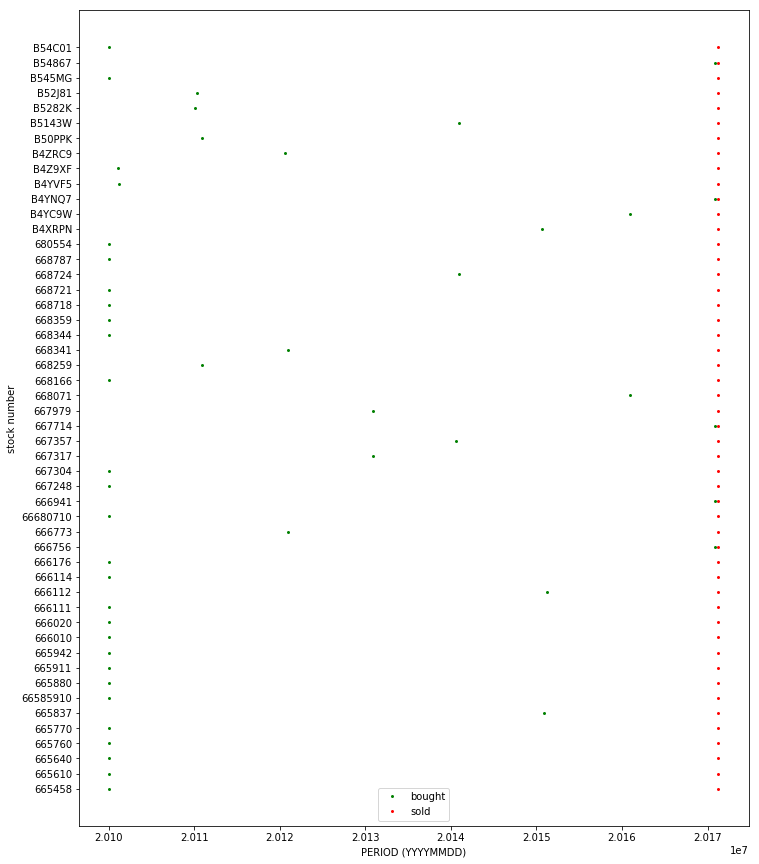

In [121]:
fig = plt.figure(figsize=(12, 15))
plt.plot(df_id1[('PERIOD (YYYYMMDD)', 'amin')], df_id1['IDENTIFIER'], '.', mfc='green', mec='None', label='bought')
plt.plot(df_id1[('PERIOD (YYYYMMDD)', 'amax')], df_id1['IDENTIFIER'], '.', mfc='red',   mec='None', label='sold')
plt.xlabel('PERIOD (YYYYMMDD)')
plt.ylabel('stock number')
plt.legend()

In [138]:
for i, (idVal, dfG) in enumerate(df[['IDENTIFIER', 'PERIOD (YYYYMMDD)', 'FUTURE 24 WEEK RETURNS']].groupby('IDENTIFIER')):
    if i> 100: break
    df1 = df[['PERIOD (YYYYMMDD)', 'FUTURE 24 WEEK RETURNS']].groupby('REGION_XL').agg(np.mean).reset_index()
    plt.plot(df1['PERIOD (YYYYMMDD)'], np.cumsum(df1['FUTURE 24 WEEK RETURNS']),label='%s'%idVal)

KeyError: 'REGION_XL'